In [1]:
# install dependencies
%pip install -q \
  matplotlib \
  pandas \
  pycaret \
  'pycaret[analysis]' \
  seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# global parameters
DATA_DIR = '../datasets/swell/final'
TEST_DATA_NAME = 'test-custom-1'
DO_SAVE_RESULTS = True
DO_COMPARE_MODELS = True
DO_PLOT_DATA = True

In [3]:
# set up the environment
import os
os.environ['PYCARET_CUSTOM_LOGGING_LEVEL'] = 'CRITICAL'

import pandas as pd
pd.set_option('display.max_columns', 128)

In [4]:
# prepare the data
from pathlib import Path
from pycaret.datasets import get_data
from zipfile import ZipFile

DATA = {
  name: None
  for name in ['train', TEST_DATA_NAME]
}

for data_name in DATA.keys():
  data_path = Path(DATA_DIR).joinpath(data_name)
  # extract the compressed data files
  ZipFile(data_path.with_suffix('.zip'), 'r').extract(
    str(data_path.with_suffix('.csv')), '..'
  )
  print(f'Data file "{data_name}" has been extracted successfully')
  # load the data
  print(f'Loading data file "{data_name}"')
  DATA[data_name] = get_data(dataset=f'{data_path}')

Data file "train" has been extracted successfully
Loading data file "train"


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,199.061782,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,114.634458,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,118.939253,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,127.318597,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,87.718281,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


Data file "test-custom-1" has been extracted successfully
Loading data file "test-custom-1"


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,SD1,SD2,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,925.973041,925.025710,90.448194,12.474020,12.473995,7.250926,64.796703,4.920767,0.166806,-0.675211,-0.230193,8.820447,127.608586,0.000027,-0.000747,0.013945,0.005296,0.005296,2.633378,1.234719,0.390740,4013.932766,85.346729,683.282549,14.528378,99.147676,5.873849,0.124893,0.852324,4703.089164,116.326212,0.008597,2.181946,1.143381,2,time pressure
1,1076.515693,637.400120,564.783533,11.314435,11.296663,49.917079,55.735370,2.001668,0.750626,-1.802077,0.375396,7.987947,798.684588,-0.000635,-0.000351,0.011469,0.005695,0.005695,2.013698,22.463016,-3.076520,23081.254383,99.020709,220.413401,0.945594,96.559010,7.854682,0.033697,3.440990,23309.522465,28.061404,0.035636,0.828993,1.131304,2,no stress
2,766.189745,768.997310,43.452527,9.331512,9.331464,4.656537,78.309584,0.917431,0.000000,-0.228441,-0.169693,6.598341,61.095876,-0.000037,-0.000109,0.012298,0.007727,0.007727,1.591680,0.236484,-0.044622,1042.302847,78.206893,254.438411,19.091224,87.602125,36.009352,2.701882,12.397875,1332.750609,7.065898,0.141525,2.194468,1.406244,2,interruption
3,1101.564476,647.894545,558.199446,11.445375,11.434589,48.770743,54.467987,2.001668,0.750626,-1.827185,0.280964,8.085475,789.371818,-0.000616,-0.000291,0.011450,0.005677,0.005677,2.016836,22.638796,-3.102406,27036.886485,99.160394,223.041407,0.818026,97.429716,5.884035,0.021580,2.570284,27265.811927,37.906203,0.026381,0.925353,1.122202,2,no stress
4,1006.461402,1007.827650,86.938644,21.506201,21.506105,4.042492,59.614805,27.439533,1.084237,0.117197,-0.327944,15.207112,122.005735,0.000070,0.000486,0.021831,0.010566,0.010566,2.066241,-0.221181,-0.110189,3918.562382,67.274253,1896.046155,32.551502,99.467559,10.149363,0.174245,0.532441,5824.757901,186.814294,0.005353,2.191665,1.340752,2,interruption


In [5]:
# set column specifications
TARGET_NAME = 'condition'
IGNORE_NAMES = ['datasetId']

In [6]:
# establish an experiment
from pycaret.classification import ClassificationExperiment

exp = ClassificationExperiment()
exp.setup(
  data=DATA['train'],
  test_data=DATA[TEST_DATA_NAME],
  target=TARGET_NAME,
  ignore_features=IGNORE_NAMES,
  index=False,
  session_id=123,
  remove_multicollinearity=True,
  multicollinearity_threshold=0.999,
  imputation_type=None,
  fold_shuffle=True,
)
exp.dataset_transformed.head(5)

,Description,Value
0,Session id,123
1,Target,condition
2,Target type,Multiclass
3,Target mapping,"interruption: 0, no stress: 1, time pressure: 2"
4,Original data shape,"(408549, 36)"
5,Transformed data shape,"(408549, 29)"
6,Transformed train set shape,"(369289, 29)"
7,Transformed test set shape,"(39260, 29)"
8,Ignore features,1
9,Numeric features,34


,MEAN_RR,MEDIAN_RR,RMSSD,SDRR_RMSSD,HR,pNN25,pNN50,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,condition
0,885.157837,853.763733,15.554504,9.063146,69.499954,11.133333,0.533333,199.061783,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,2.143342,2661.894043,72.203285,1009.249390,27.375666,98.485260,15.522602,0.421047,1.514737,3686.666260,65.018051,0.015380,2.139754,1.163485,1
1,939.425354,948.357849,12.964439,6.272368,64.363152,5.600000,0.000000,114.634460,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,2.930855,2314.265381,76.975731,690.113281,22.954140,99.695396,2.108526,0.070133,0.304603,3006.487305,327.296631,0.003055,2.174499,1.084711,0
2,898.186035,907.006836,16.305279,5.182201,67.450066,13.066667,0.200000,118.939255,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,2.127053,1373.887085,51.152225,1298.222656,48.335102,98.950470,13.769730,0.512671,1.049528,2685.879395,94.280907,0.010607,2.135350,1.176315,0
3,881.757874,893.460022,15.720469,5.748590,68.809563,11.800000,0.133333,127.318596,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,2.050988,2410.357422,70.180305,1005.981689,29.290304,98.224709,18.181913,0.529387,1.775294,3434.520996,55.328701,0.018074,2.178341,1.179688,1
4,809.625305,811.184875,19.213820,3.266724,74.565727,20.200001,0.200000,87.718277,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,1.816544,1151.177368,43.918365,1421.782104,54.242161,96.720009,48.215824,1.839473,3.279993,2621.175293,29.487873,0.033912,2.221121,1.249612,1


In [21]:
('Removed columns: ', list(
  set(IGNORE_NAMES) |
  (set(exp.dataset.columns) - set(exp.dataset_transformed.columns))
))

('Removed columns: ',
 ['KURT_REL_RR',
  'SKEW_REL_RR',
  'SDSD',
  'SD1',
  'RMSSD_REL_RR',
  'SDRR',
  'datasetId'])

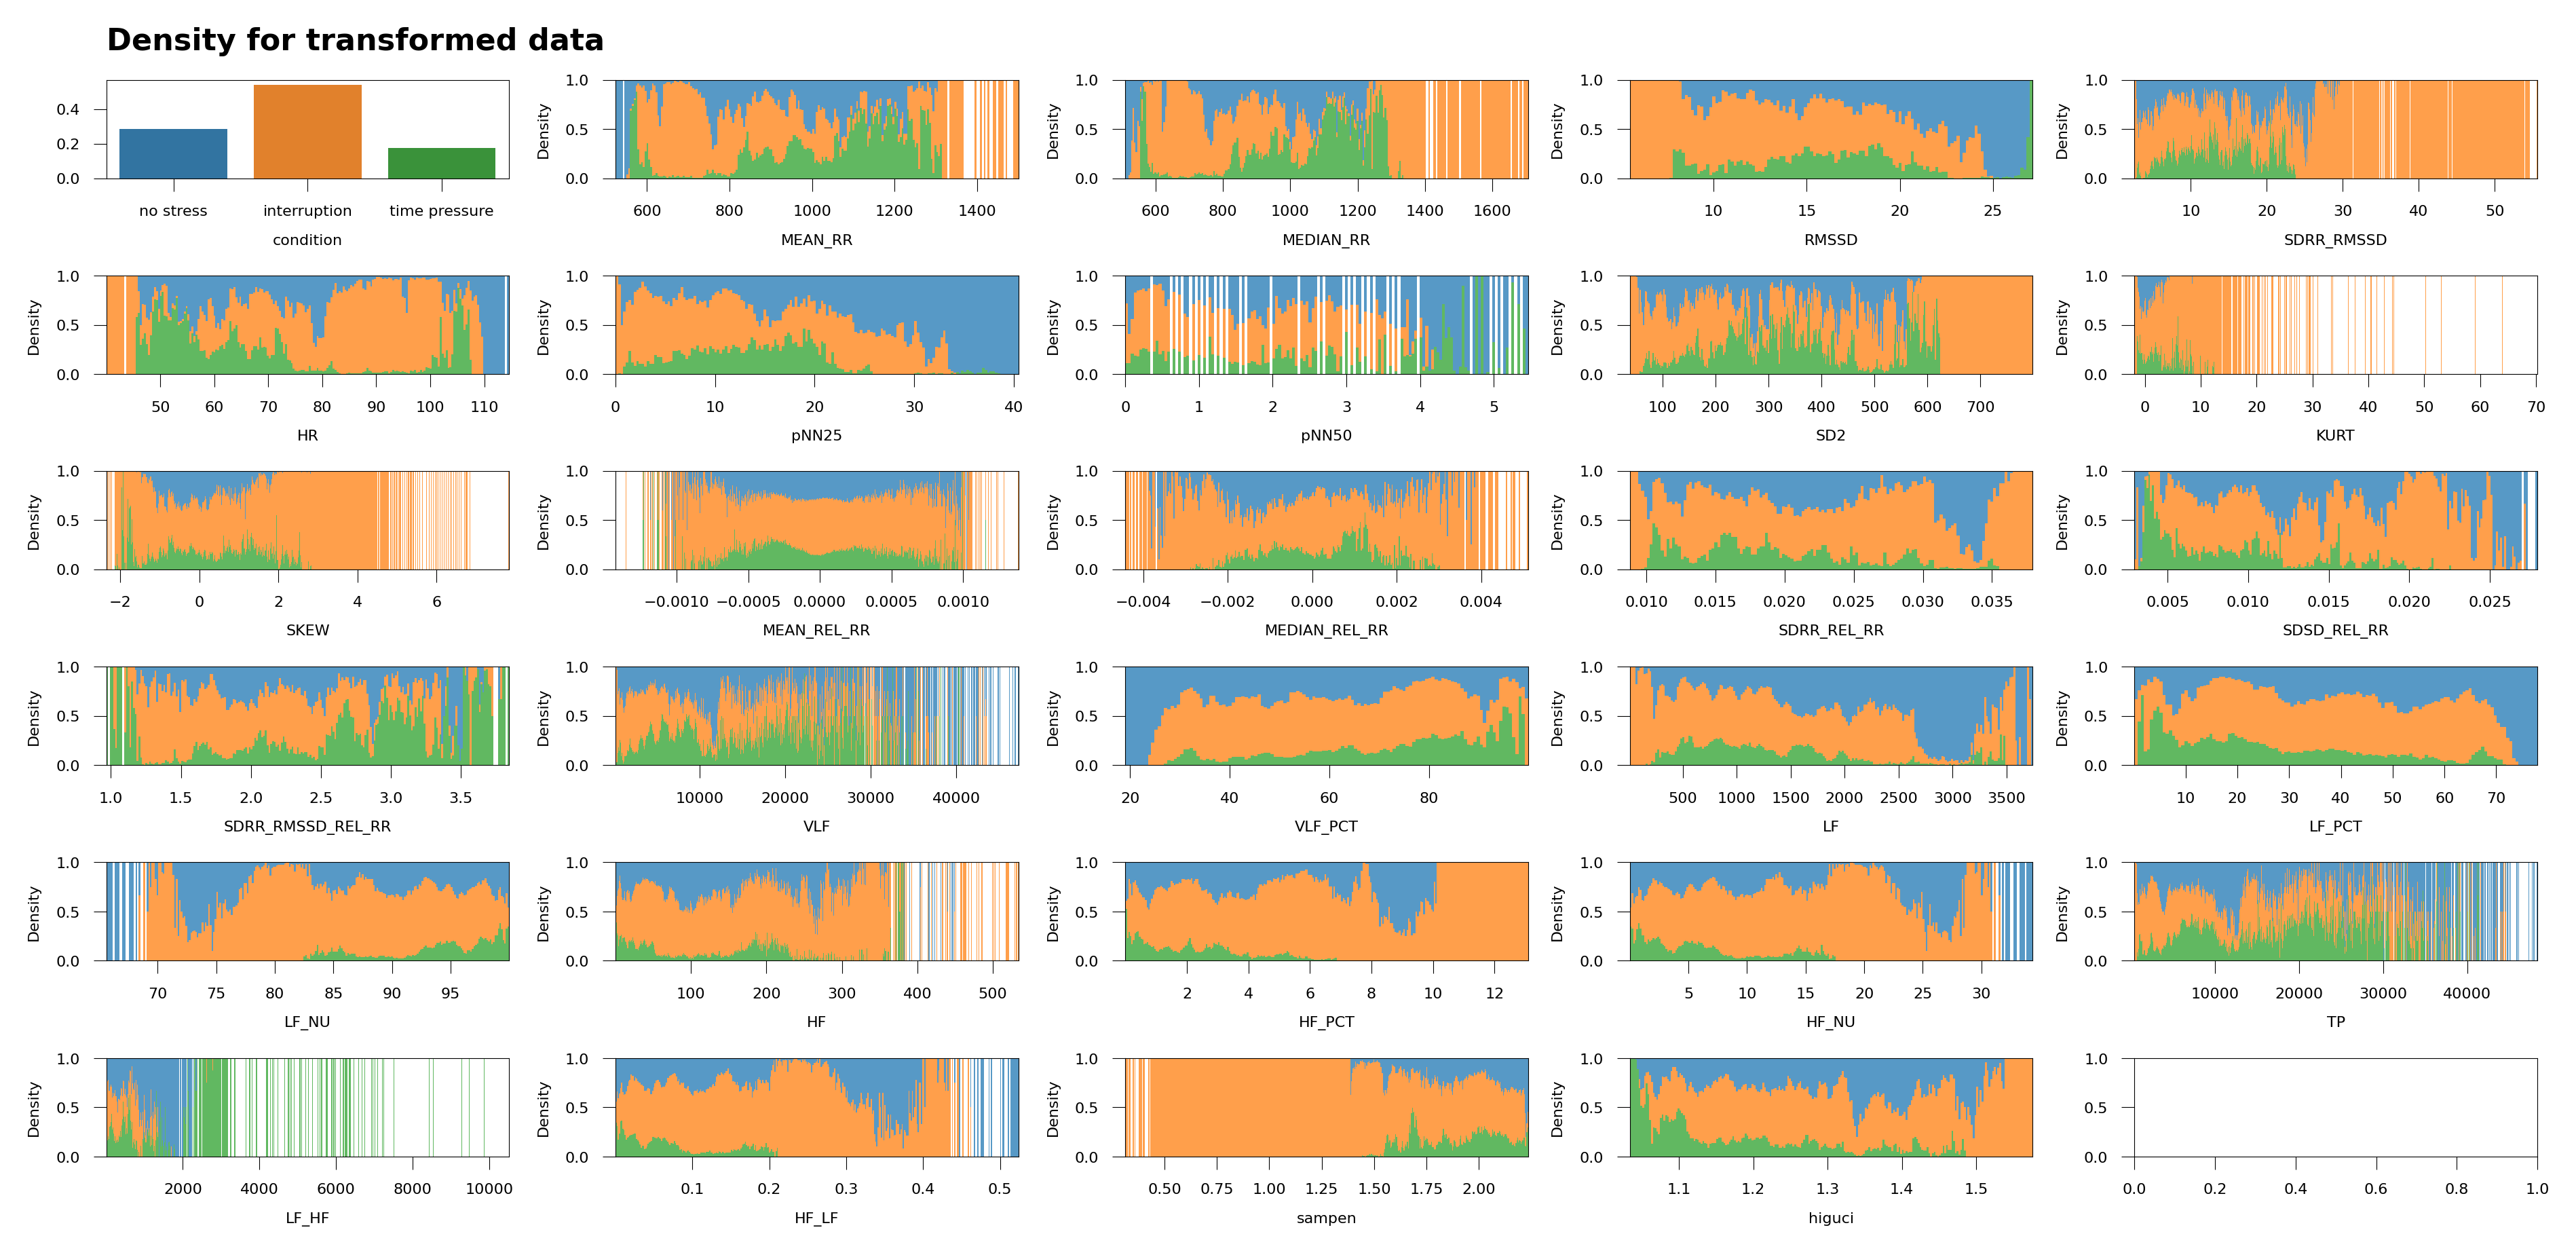

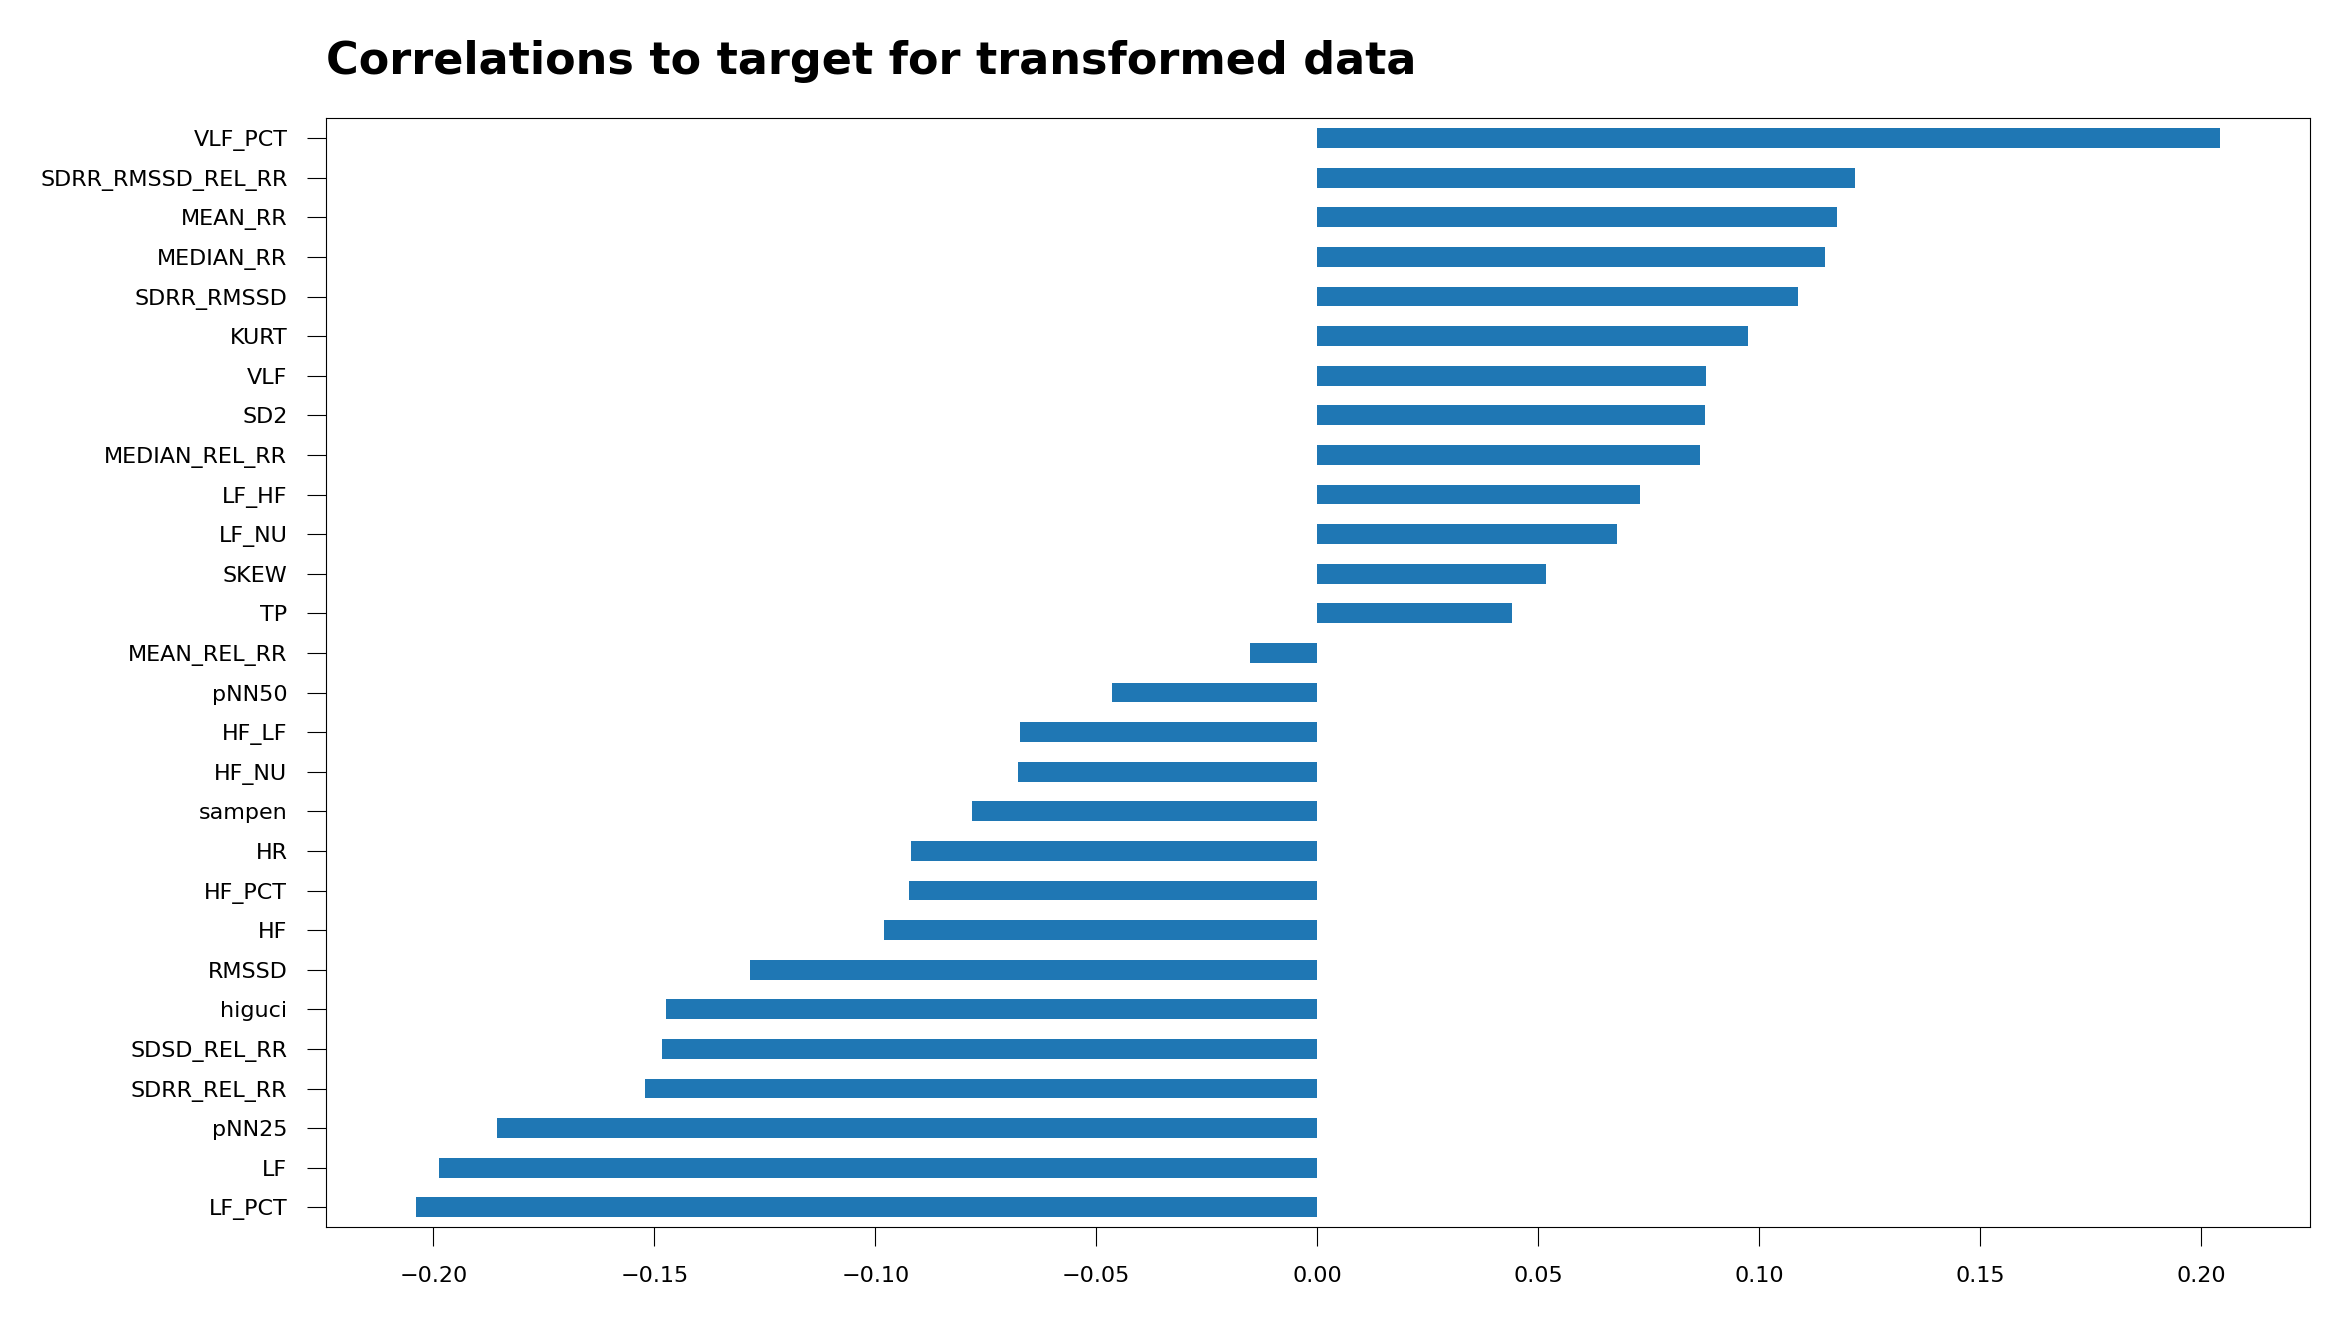

In [22]:
# show the distributions of the data

# DO_PLOT_DATA = True
if DO_PLOT_DATA:
  # set plot parameters
  from pathlib import Path
  import matplotlib.pyplot as plt
  import seaborn as sns

  # reset old global plot parameters
  plt.rcdefaults()

  # adjustable global plot parameters
  COLORMAP = sns.color_palette()
  DPI = 400
  OUTLINE_WIDTH = 0.2
  plt.rcParams['axes.grid'] = False
  plt.rcParams['axes.linewidth'] = OUTLINE_WIDTH
  plt.rcParams['figure.dpi'] = DPI
  plt.rcParams['font.size'] = 4
  plt.rcParams['xtick.major.width'] = OUTLINE_WIDTH
  plt.rcParams['xtick.minor.width'] = OUTLINE_WIDTH
  plt.rcParams['ytick.major.width'] = OUTLINE_WIDTH
  plt.rcParams['ytick.minor.width'] = OUTLINE_WIDTH
  plot_dir = Path(f'../images/{TEST_DATA_NAME}')
  plot_dir.mkdir(parents=True, exist_ok=True)

  from math import ceil

  # adjustable local plot parameters
  TITLE = 'Density for transformed data'
  SUBPLOT_SIZE = (750, 300)

  # setting local plot parameters
  plots_per_col = 5
  shape = (plots_per_col, ceil(exp.dataset_transformed.shape[1] / plots_per_col))
  figsize = tuple(pxs[0] * pxs[1] / DPI for pxs in zip(SUBPLOT_SIZE, shape))
  title_params = {
    'label': TITLE,
    'fontdict': {
      'fontsize': plt.rcParams['font.size'] * 2,
      'fontweight': 'bold',
    },
    'loc': 'left',
    'pad': plt.rcParams['font.size'] * 2,
  }

  # plot grid
  axs = plt.subplots(
    nrows=shape[1],
    ncols=shape[0],
    layout='constrained',
    figsize=figsize,
  )[1].flat

  # plot target distribution
  target_dist_data = exp.y_transformed.value_counts(normalize=True)
  ax = sns.barplot(
    x=target_dist_data.index,
    y=target_dist_data.values,
    ax=axs[0],
    palette=COLORMAP,
  )

  # plot data title and labels
  axs[0].set_title(**title_params)
  axs[0].set_xlabel('condition')
  axs[0].set_xticklabels(exp.y.value_counts().index)

  # plot features distribution
  for x, ax in zip(exp.X_transformed.columns, axs[1:]):
    sns.histplot(
      data=exp.dataset_transformed,
      x=x,
      ax=ax,
      hue=TARGET_NAME,
      legend=False,
      linewidth=0,
      multiple='fill',
      palette=COLORMAP,
      stat='density',
    )

  # save the plot
  plt.savefig(
    fname=plot_dir.joinpath(f'{TITLE}.png'),
    bbox_inches='tight',
  )
  plt.show()

  # check correlation between target and features
  # adjustable plot parameters
  TITLE = 'Correlations to target for transformed data'
  PLOT_SIZE = (2560, 1440)

  # setting plot parameters
  figsize = tuple(px / DPI for px in PLOT_SIZE)
  title_params = {
    'label': TITLE,
    'fontdict': {
      'fontsize': plt.rcParams['font.size'] * 2,
      'fontweight': 'bold',
    },
    'loc': 'left',
    'pad': plt.rcParams['font.size'] * 2,
  }

  # plot correlation to target
  target_corr_data = (exp.dataset_transformed
    .corr()[TARGET_NAME]
    .drop(TARGET_NAME)
    .sort_values())
  ax = target_corr_data.plot.barh(figsize=figsize)
  ax.set_title(**title_params)

  # save the plot
  plt.savefig(
    fname=plot_dir.joinpath(f'{TITLE}.png'),
    bbox_inches='tight',
  )
  plt.show()

  # reset plot parameters
  plt.rcdefaults()

In [23]:
# compare models with AUROC

# DO_COMPARE_MODELS = True
if DO_COMPARE_MODELS:
  exp.compare_models(
    exclude=[ # excludes slow and unsuitable models
      'ada',
      'catboost',
      'gbc',
      'knn',
      'lr',
      'ridge',
      'rf',
      'svm',
    ],
    sort='auc',
    cross_validation=False,
  )
  None

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7601,0.8802,0.7601,0.7600,0.7588,0.5936,0.5943,3.3700
et,Extra Trees Classifier,0.7269,0.8765,0.7269,0.7258,0.7260,0.5402,0.5404,4.0300
lightgbm,Light Gradient Boosting Machine,0.7303,0.8693,0.7303,0.7395,0.7310,0.5514,0.5543,4.6200
dt,Decision Tree Classifier,0.6321,0.7030,0.6321,0.6428,0.6355,0.4010,0.4025,10.7500
lda,Linear Discriminant Analysis,0.3670,0.6709,0.3670,0.5820,0.3077,0.1130,0.1728,1.5400
nb,Naive Bayes,0.4689,0.6618,0.4689,0.5278,0.4773,0.1921,0.2030,0.9000
qda,Quadratic Discriminant Analysis,0.5356,0.6380,0.5356,0.5294,0.5320,0.2092,0.2095,1.2300
dummy,Dummy Classifier,0.5414,0.0000,0.5414,0.2931,0.3803,0.0000,0.0000,0.8600


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [7]:
# assign the best model id manually
BEST_MODEL_ID = 'xgboost'

best_model = exp.create_model(
  estimator=BEST_MODEL_ID,
  cross_validation=False,
)
best_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.7601,0.8802,0.7601,0.7600,0.7588,0.5936,0.5943


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

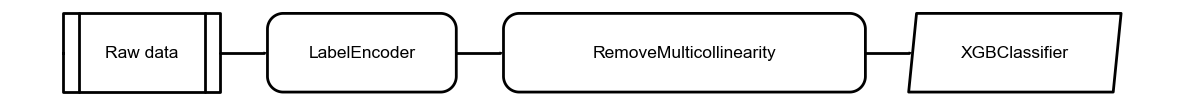

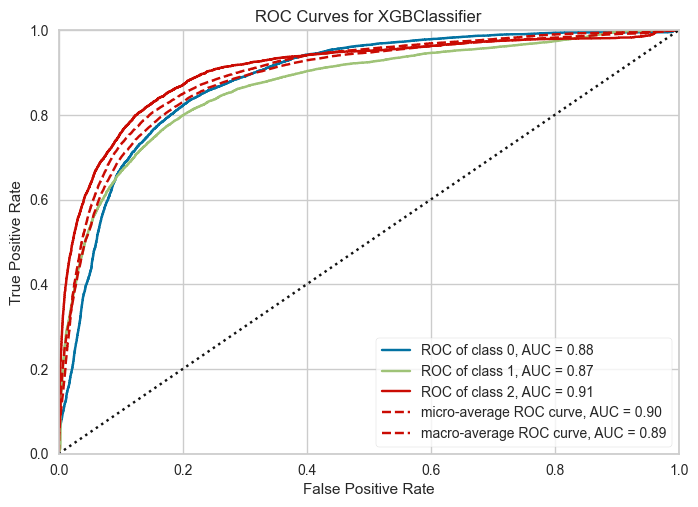

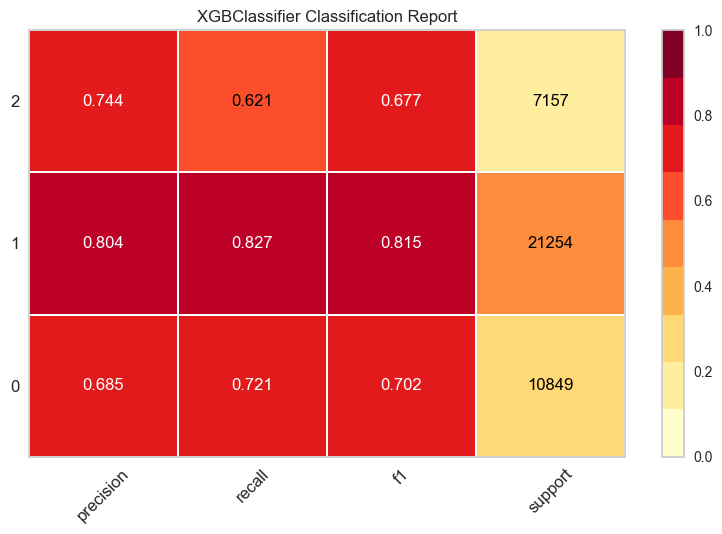

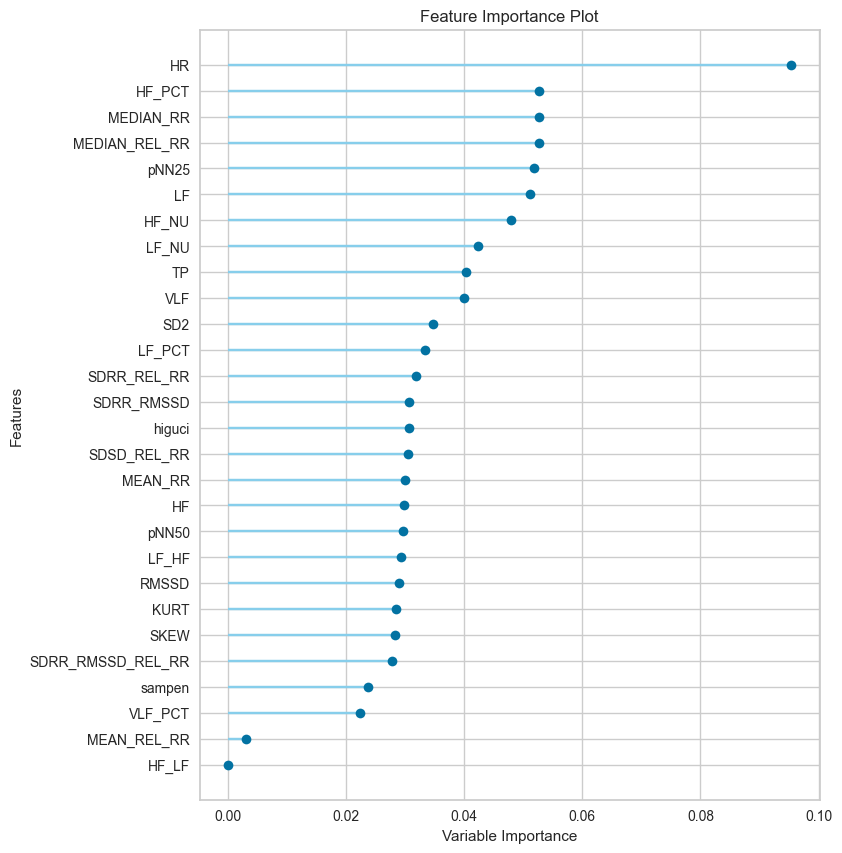

,Parameters
objective,multi:softprob
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,None
device,cpu
early_stopping_rounds,None
enable_categorical,False


In [23]:
plot_types = [
  'pipeline',
  'auc',
  'class_report',
  'feature_all',
  'parameter',
]
for plot_type in plot_types:
  exp.plot_model(
    estimator=best_model,
    plot=plot_type,
  )

In [33]:
# show hold-out predictions
predictions = exp.predict_model(
  estimator=best_model,
)
display(predictions[filter(
  lambda name: name.startswith('prediction_'),
  predictions.columns,
)].sample(
  n=15,
  random_state=123,
))
predictions = None

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7601,0.8802,0.7601,0.7600,0.7588,0.5936,0.5943


,prediction_label,prediction_score
373100,interruption,0.9705
373377,no stress,0.9978
387762,no stress,0.9994
397655,interruption,0.5893
376683,interruption,0.7691
373069,interruption,0.9859
373328,interruption,0.9553
369773,interruption,0.8383
396780,time pressure,0.9999
388220,time pressure,0.9989


In [34]:
# save the experiment and model

# DO_SAVE_RESULTS = True
if DO_SAVE_RESULTS:
  from pathlib import Path

  result_dir = Path(f'../models/{TEST_DATA_NAME}')
  result_dir.mkdir(
    parents=True,
    exist_ok=True,
  )
  exp.save_experiment(
    path_or_file=result_dir.joinpath('experiment.pkl'),
  )
  exp.save_model(
    model=best_model,
    model_name=result_dir.joinpath('model'),
  )

Transformation Pipeline and Model Successfully Saved
